In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
import io

In [2]:
url = ('https://storage.googleapis.com/earthenginepartners-hansen/GFC-2019-v1.7/Hansen_GFC-2019-v1.7_treecover2000_60N_120E.tif')

In [3]:
Image.MAX_IMAGE_PIXELS = None
data_tile = np.array(
    Image.open(
        io.BytesIO(
            requests.get(url).content)))

In [4]:
forest = data_tile[6450:6600,3850:4000]/100
forest

array([[0.73, 0.73, 0.78, ..., 0.45, 0.37, 0.29],
       [0.64, 0.64, 0.75, ..., 0.45, 0.45, 0.47],
       [0.64, 0.64, 0.78, ..., 0.31, 0.31, 0.31],
       ...,
       [0.44, 0.44, 0.33, ..., 0.44, 0.44, 0.54],
       [0.32, 0.32, 0.45, ..., 0.51, 0.51, 0.51],
       [0.39, 0.39, 0.32, ..., 0.32, 0.32, 0.31]])

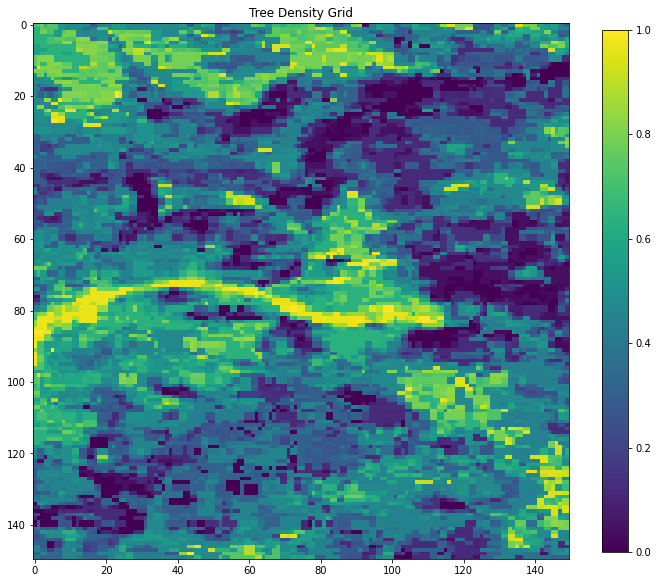

In [5]:
import numpy as np
import random


tree_density_grid = forest

# Visualizing the synthetic tree density grid
plt.figure(figsize=(12, 12))
plt.imshow(tree_density_grid, cmap='viridis')
plt.colorbar(shrink=0.8)
plt.title("Tree Density Grid")
plt.show()

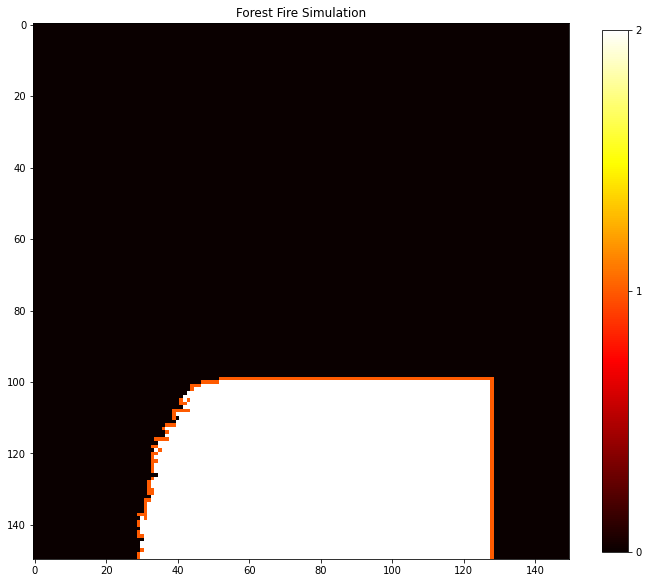

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class ForestFireSimulation:
    def __init__(self, grid_size=(150, 150)):
        """
        Initialize the simulation with the specified grid size.

        Parameters:
        grid_size (tuple): A tuple representing the dimensions of the simulation grid.
        """
        self.grid_size = grid_size  # Dimensions of the grid
        self.tree_density_grid = np.random.rand(*grid_size)  # Random tree density for each cell
        self.grid_states = np.zeros(grid_size)  # State of each cell: 0 for unaffected, 1 for burning, 2 for burnt
        self.wind_direction = 0  # Wind direction in degrees
        self.wind_strength = 0  # Wind strength

    def set_wind(self, direction, strength):
        """
        Set the wind direction and strength for the simulation.

        Parameters:
        direction (float): Wind direction in degrees.
        strength (float): Wind strength.
        """
        self.wind_direction = direction
        self.wind_strength = strength

    def start_fire(self):
        """
        Start a fire at a random location with non-zero tree density.
        The fire will start in a cell that is not empty (tree density > 0).
        """
        while True:
            x, y = np.random.randint(0, self.grid_size[0]), np.random.randint(0, self.grid_size[1])
            if self.tree_density_grid[x, y] > 0:
                self.grid_states[x, y] = 1  # Set the cell state to burning
                break

    def simulate(self, steps=50):
        """
        Run the fire spread simulation for the specified number of steps.

        Parameters:
        steps (int): Number of time steps to simulate.
        """
        for _ in range(steps):
            new_states = self.grid_states.copy()

            for x in range(self.grid_size[0]):
                for y in range(self.grid_size[1]):
                    if self.grid_states[x, y] == 1:  # Check if the cell is currently burning
                        # Attempt to spread the fire to adjacent cells
                        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                            nx, ny = x + dx, y + dy
                            if 0 <= nx < self.grid_size[0] and 0 <= ny < self.grid_size[1]:
                                if self.grid_states[nx, ny] == 0 and self.tree_density_grid[nx, ny] > 0:
                                    wind_effect = self._get_wind_effect(dx, dy)
                                    spread_prob = self._calculate_fire_spread_probability(self.tree_density_grid[nx, ny], wind_effect)
                                    if np.random.rand() < spread_prob:
                                        new_states[nx, ny] = 1
                        new_states[x, y] = 2  # Update the cell state to burnt

            self.grid_states = new_states  # Update the grid states

            if np.all(self.grid_states != 1):  # Stop if there are no more burning cells
                break

    def visualize(self):
        """
        Visualize the current state of the grid using a heatmap.
        Unaffected cells are shown in black, burning cells in red, and burnt cells in gray.
        """
        plt.figure(figsize=(12, 12))
        plt.imshow(self.grid_states, cmap='hot')
        plt.colorbar(shrink=0.8, ticks=[0, 1, 2])
        plt.title("Forest Fire Simulation")
        plt.show()

    def _calculate_fire_spread_probability(self, density, wind_effect):
        """
        Calculate the probability of fire spreading to a cell based on tree density and wind effect.

        Parameters:
        density (float): Tree density of the cell.
        wind_effect (float): Calculated effect of the wind on fire spread.

        Returns:
        float: Probability of the cell catching fire.
        """
        if density == 0:
            return 0  # No probability of spreading to empty cells

        base_probability = density  # Base probability proportional to tree density
        amplified_probability = base_probability + wind_effect * (1 - base_probability)
        return min(amplified_probability, 1)  # Probability capped at 1


    def _get_wind_effect(self, dx, dy):
        """
        Calculate the wind effect on fire spread based on wind direction and cell position.

        Parameters:
        dx (int): Relative x-position of the adjacent cell.
        dy (int): Relative y-position of the adjacent cell.

        Returns:
        float: Effect of the wind on spreading fire to the cell.
        """
        angle_rad = np.radians(self.wind_direction)
        wind_dx, wind_dy = np.cos(angle_rad), np.sin(angle_rad)
        dot_product = wind_dx * dx + wind_dy * dy
        normalized_effect = (dot_product + 1) / 2  # Normalize to range [0, 1]
        wind_effect = normalized_effect * self.wind_strength
        return max(0, wind_effect)
    
    def apply_strategy(self, strategy_type, risk_grid, risk_threshold):
        # Identify high-risk cells based on the risk threshold
        high_risk_cells = risk_grid > risk_threshold

        if strategy_type == 'surveillance':
            # Increase detection in high-risk areas only
            # Assuming there's a mechanism to enhance surveillance based on cell location
            self.enhanced_surveillance_cells = high_risk_cells

        elif strategy_type == 'control':
            # Implement control measures like firebreaks in high-risk areas only
            for x in range(self.grid_size[0]):
                for y in range(self.grid_size[1]):
                    if high_risk_cells[x, y]:
                        # Assuming a method to create a firebreak around a given cell
                        self.create_firebreak_around(x, y)
    def create_firebreak_around(self, x, y):
        # Define the range for creating a firebreak
        firebreak_range = 1 

        # Loop over the range to set the tree density to 0 within the firebreak
        for i in range(x - firebreak_range, x + firebreak_range + 1):
            for j in range(y - firebreak_range, y + firebreak_range + 1):
                if 0 <= i < self.grid_size[0] and 0 <= j < self.grid_size[1]:
                    self.tree_density_grid[i, j] = 0



# Full wind strength
simulation = ForestFireSimulation()
simulation.set_wind(direction=90, strength=1)
simulation.start_fire()
simulation.simulate()
simulation.visualize()


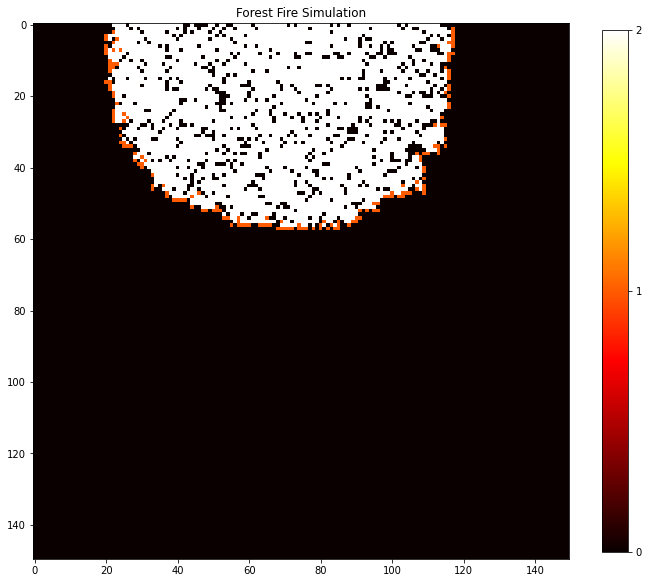

In [7]:
# Test Case 1: No Wind Condition
simulation_no_wind = ForestFireSimulation()
simulation_no_wind.set_wind(direction=0, strength=0)  # No wind
simulation_no_wind.start_fire()
simulation_no_wind.simulate()
simulation_no_wind.visualize()


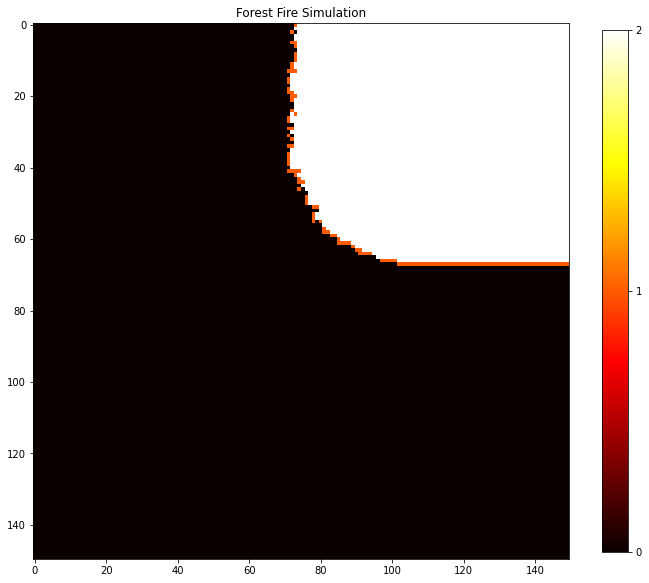

In [8]:
# Test Case 2: Strong Wind Condition
simulation_strong_wind = ForestFireSimulation()
simulation_strong_wind.set_wind(direction=90, strength=1)  # Strong eastward wind
simulation_strong_wind.start_fire()
simulation_strong_wind.simulate()
simulation_strong_wind.visualize()

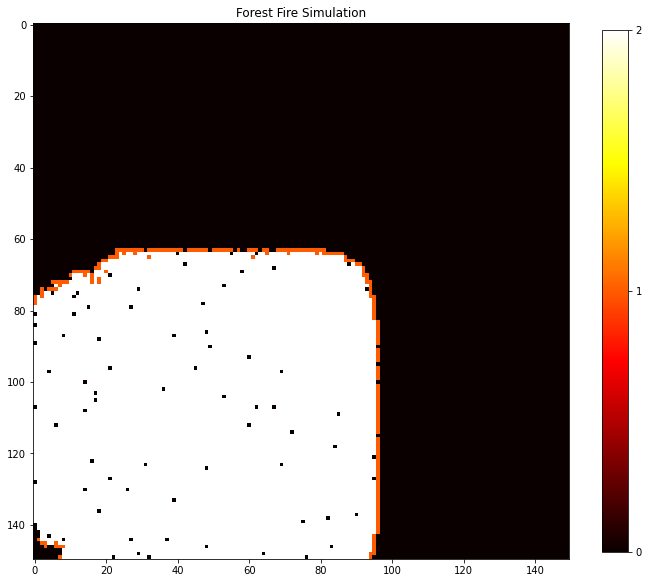

In [9]:
# Test Case 4: Wind strength = 0.5
simulation_strong_wind = ForestFireSimulation()
simulation_strong_wind.set_wind(direction=90, strength=0.5)
simulation_strong_wind.start_fire()
simulation_strong_wind.simulate()
simulation_strong_wind.visualize()

In [10]:
# Animated version
from matplotlib.animation import FuncAnimation

class ForestFireSimulationAnimated(ForestFireSimulation):
    def __init__(self):
        """
        Initialize the simulation with a predefined grid size.
        """
        self.grid_size = (150, 150)  # Specify the grid size as a 2D shape
        self.tree_density_grid = forest  # Initialize the tree density grid
        self.grid_states = np.zeros(self.grid_size)  # Initialize the grid states
        self.wind_direction = 0  # In degrees
        self.wind_strength = 0


    def simulate(self, steps=50):
        """
        Run the fire spread simulation for a given number of steps and yield the grid state at each step.
        """
        for _ in range(steps):
            new_states = self.grid_states.copy()

            for x in range(self.grid_size[0]):
                for y in range(self.grid_size[1]):
                    if self.grid_states[x, y] == 1:  # If the cell is burning
                        # Spread the fire based on tree density and wind
                        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                            nx, ny = x + dx, y + dy
                            if 0 <= nx < self.grid_size[0] and 0 <= ny < self.grid_size[1]:
                                if self.grid_states[nx, ny] == 0:
                                    wind_effect = self._get_wind_effect(dx, dy)
                                    spread_prob = self._calculate_fire_spread_probability(self.tree_density_grid[nx, ny], wind_effect)
                                    if np.random.rand() < spread_prob:
                                        new_states[nx, ny] = 1
                        new_states[x, y] = 2  # The cell is now burnt

            self.grid_states = new_states
            yield self.grid_states

            # Stop if no more fire is spreading
            if np.all(self.grid_states != 1):
                break

# Function to create an animation

def create_animation(simulation, steps=50):
    fig, ax = plt.subplots(figsize=(12, 12))
    simulation.start_fire()
    simulation.set_wind(direction=180, strength=0.5)

    def update(frame):
        ax.clear()
        ax.imshow(frame, cmap='hot')
        ax.set_title("Forest Fire Simulation - Step {}".format(frame))

    # Set save_count to the number of steps in the simulation
    anim = FuncAnimation(fig, update, frames=simulation.simulate(steps), interval=100, save_count=steps)
    plt.close(fig)  # Prevents duplicate display
    return anim



simulation_animated = ForestFireSimulationAnimated()
anim = create_animation(simulation_animated, steps=200)

from IPython.display import HTML
HTML(anim.to_jshtml())



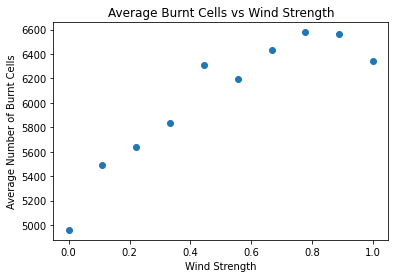

In [11]:
import numpy as np
import matplotlib.pyplot as plt

'''
This code cell would return the Average burnt cells vs Wind strength plot. It will run 100 times for each wind strength.
Theoretically, as the wind strength increases, the average number of burnt cells would increase.
With this code cell, we can check if our simulation is working properly as well.
'''
# Settings for the range of wind strengths to test and the number of runs per strength
wind_strengths_to_test = np.linspace(0, 1, 10)  # Creates an array of 10 evenly spaced wind strengths from 0 to 1
num_runs_per_strength = 100  # Sets the number of simulation runs for each wind strength to ensure statistical significance

# Lists to hold the aggregate results of the simulations
wind_strengths = []  # Will store the wind strengths tested
average_burnt_cells = []  # Will store the average number of burnt cells for each wind strength

# Run simulations for a range of wind strengths
for wind_strength in wind_strengths_to_test:
    total_burnt_cells = 0  # Initialize the total number of burnt cells for this wind strength
    
    # Perform multiple runs for each wind strength to account for variability
    for _ in range(num_runs_per_strength):
        wind_direction = np.random.randint(0, 360)  # Random wind direction for each run
        simulation = ForestFireSimulation()  # Create a new instance of the simulation
        simulation.set_wind(direction=wind_direction, strength=wind_strength)  # Set the wind conditions
        simulation.start_fire()  # Start the fire at a random location
        simulation.simulate()  # Run the simulation
        total_burnt_cells += np.sum(simulation.grid_states == 2)  # Count the total number of burnt cells

    # Calculate the average number of burnt cells for this wind strength
    avg_burnt = total_burnt_cells / num_runs_per_strength
    wind_strengths.append(wind_strength)  # Append the tested wind strength to the list
    average_burnt_cells.append(avg_burnt)  # Append the average number of burnt cells to the list

# Plot the results as a scatter plot
plt.scatter(wind_strengths, average_burnt_cells)
plt.title('Average Burnt Cells vs Wind Strength')
plt.xlabel('Wind Strength')
plt.ylabel('Average Number of Burnt Cells')
plt.show()


As we can see from the scatter plot above, the average number of burnt cells increases as the wind strength increases. If we run it more than 100 times, the error will decrease and we would see a clearer correlation.

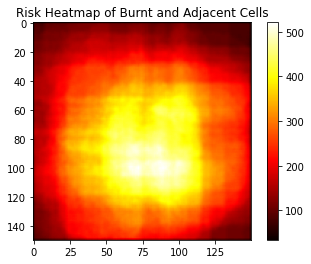

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def find_high_risk_cells(num_simulations, grid_size=(150, 150), max_wind_strength=2):
    risk_grid = np.zeros(grid_size)

    for _ in range(num_simulations):
        # Randomize wind direction (0-360 degrees) and strength (0 to max_wind_strength)
        wind_direction = np.random.randint(0, 360)
        wind_strength = np.random.uniform(0, max_wind_strength)

        # Run the simulation with randomized wind settings
        simulation = ForestFireSimulation(grid_size)
        simulation.set_wind(wind_direction, wind_strength)
        simulation.start_fire()
        simulation.simulate()

        # Process the results
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                if simulation.grid_states[x, y] == 2:  # If the cell is burnt
                    risk_grid[x, y] += 1  # Increase risk for burnt cell
                    # Increase risk for adjacent cells
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < grid_size[0] and 0 <= ny < grid_size[1]:
                            risk_grid[nx, ny] += 1

    return risk_grid

# Run the function and visualize the results
high_risk_cells = find_high_risk_cells(num_simulations=100)
plt.imshow(high_risk_cells, cmap='hot')
plt.colorbar()
plt.title('Risk Heatmap of Burnt and Adjacent Cells')
plt.show()


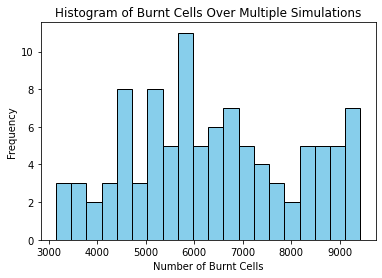

In [13]:
def run_simulations(num_runs, grid_size=(150, 150)):
    burnt_cells_counts = []

    for _ in range(num_runs):
        simulation = ForestFireSimulation(grid_size)
        simulation.set_wind(direction=np.random.randint(0, 360), strength=np.random.uniform(0, 2))
        simulation.start_fire()
        simulation.simulate()
        burnt_cells = np.sum(simulation.grid_states == 2)  # Counting burnt cells
        burnt_cells_counts.append(burnt_cells)

    return burnt_cells_counts

# Run the simulations
num_runs = 100
burnt_cells_counts = run_simulations(num_runs)

# Plotting the histogram
plt.hist(burnt_cells_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Burnt Cells Over Multiple Simulations')
plt.xlabel('Number of Burnt Cells')
plt.ylabel('Frequency')
plt.show()

In [14]:
def calculate_risk_grid(num_runs, grid_size):
    # Initialize a grid to accumulate the risk levels
    risk_accumulation_grid = np.zeros(grid_size)
    
    for _ in range(num_runs):
        simulation = ForestFireSimulation(grid_size)
        simulation.set_wind(direction=np.random.randint(0, 360), strength=np.random.uniform(0, 2))
        simulation.start_fire()
        simulation.simulate()
        
        # Accumulate the state of burnt cells
        risk_accumulation_grid += (simulation.grid_states == 2)
    
    # Calculate the average risk by dividing by the number of runs
    risk_grid = risk_accumulation_grid / num_runs
    return risk_grid


risk_grid = calculate_risk_grid(num_runs=100, grid_size=(150, 150))

risk_grid

array([[0.11, 0.11, 0.09, ..., 0.05, 0.06, 0.05],
       [0.1 , 0.11, 0.11, ..., 0.06, 0.06, 0.05],
       [0.09, 0.11, 0.11, ..., 0.06, 0.06, 0.05],
       ...,
       [0.1 , 0.11, 0.11, ..., 0.11, 0.09, 0.09],
       [0.09, 0.1 , 0.1 , ..., 0.1 , 0.08, 0.09],
       [0.09, 0.1 , 0.1 , ..., 0.11, 0.09, 0.09]])

Baseline Average Burnt Cells: 6386.08
Surveillance Strategy Average Burnt Cells: 6516.73
Control Strategy Average Burnt Cells: 3611.84


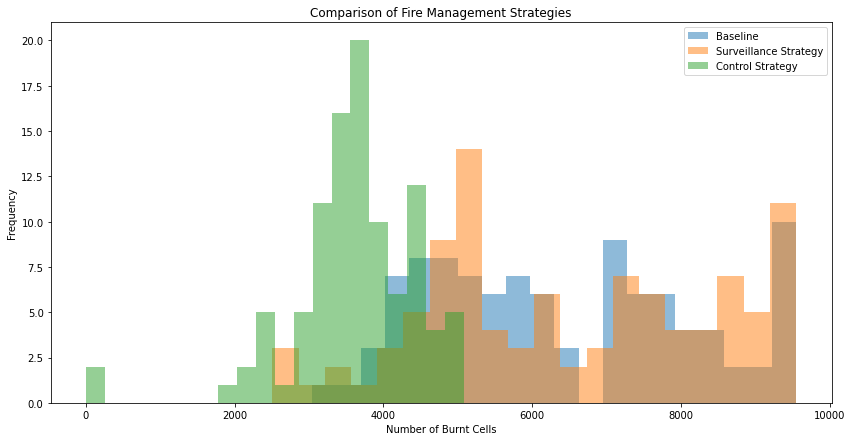

In [15]:
def run_simulation_with_strategy(num_runs, strategy_type, risk_grid, risk_threshold):
    results = []
    for _ in range(num_runs):
        sim = ForestFireSimulation()
        if strategy_type is not None:  # Check if a strategy needs to be applied
            sim.apply_strategy(strategy_type, risk_grid, risk_threshold)
        sim.set_wind(direction=np.random.randint(0, 360), strength=np.random.uniform(0, 2))
        sim.start_fire()
        sim.simulate()
        results.append(np.sum(sim.grid_states == 2))  # Count burnt cells
    return results

risk_grid = calculate_risk_grid(num_runs=100, grid_size = (150, 150))

# Define a risk threshold based on your analysis of the risk_grid
risk_threshold = np.percentile(risk_grid, 75)  # top 25% high-risk areas


# Run baseline simulations without any strategy
baseline_results = run_simulation_with_strategy(100, None, risk_grid, risk_threshold)

# Run simulations with enhanced surveillance strategy
surveillance_results = run_simulation_with_strategy(100, 'surveillance', risk_grid, risk_threshold)

# Run simulations with preemptive control measures strategy
control_results = run_simulation_with_strategy(100, 'control', risk_grid, risk_threshold)


# Compare results
print("Baseline Average Burnt Cells:", np.mean(baseline_results))
print("Surveillance Strategy Average Burnt Cells:", np.mean(surveillance_results))
print("Control Strategy Average Burnt Cells:", np.mean(control_results))

# Visualize the results
plt.figure(figsize=(14, 7))
plt.hist(baseline_results, bins=20, alpha=0.5, label='Baseline')
plt.hist(surveillance_results, bins=20, alpha=0.5, label='Surveillance Strategy')
plt.hist(control_results, bins=20, alpha=0.5, label='Control Strategy')
plt.legend()
plt.xlabel('Number of Burnt Cells')
plt.ylabel('Frequency')
plt.title('Comparison of Fire Management Strategies')
plt.show()



In [16]:
from scipy import stats
import numpy as np

# Function to calculate the mean and 95% confidence interval
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2., n-1)  # Margin of error
    return mean, mean - margin, mean + margin

# Calculate the confidence intervals for each strategy
baseline_mean, baseline_low, baseline_high = mean_confidence_interval(baseline_results)
surveillance_mean, surveillance_low, surveillance_high = mean_confidence_interval(surveillance_results)
control_mean, control_low, control_high = mean_confidence_interval(control_results)

# Print the results
print(f"Baseline Strategy: Mean = {baseline_mean:.2f}, 95% CI = ({baseline_low:.2f}, {baseline_high:.2f})")
print(f"Surveillance Strategy: Mean = {surveillance_mean:.2f}, 95% CI = ({surveillance_low:.2f}, {surveillance_high:.2f})")
print(f"Control Strategy: Mean = {control_mean:.2f}, 95% CI = ({control_low:.2f}, {control_high:.2f})")



Baseline Strategy: Mean = 6386.08, 95% CI = (6039.41, 6732.75)
Surveillance Strategy: Mean = 6516.73, 95% CI = (6134.51, 6898.95)
Control Strategy: Mean = 3611.84, 95% CI = (3443.66, 3780.02)
